# Linear LFM

Replication of the paper by [Lawrence et al., 2006.](https://papers.nips.cc/paper/3119-modelling-transcriptional-regulation-using-gaussian-processes.pdf)

The dataset required is small and is available preprocessed here:

- https://drive.google.com/drive/folders/1Tg_3SlKbdv0pDog6k2ys0J79e1-vgRyd?usp=sharing

### Probesets

The original paper restricted their interest to 5 known targets of p53:

| Target       | Probeset     | Aliases    |
| :------------- | :----------: | :----------- |
| DDB2 |  203409_at    | |
| p21   | 202284_s_at | p21CIP1, CDKN1A |
| SESN1/hPA26   | 218346_s_at |  |
| BIK   | 205780_at |  |
| TNFRSF10b   | 209294_x_at, 209295_at, 210405_x_at |  |

In [1]:
import torch

from lafomo.exact import AnalyticalLFM, Trainer
from lafomo.datasets import P53Data
from lafomo.plot import Plotter


In [2]:
dataset = P53Data(replicate=0, data_dir='../../../data/')
model = AnalyticalLFM(dataset, dataset.variance.reshape(-1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = Trainer(model, optimizer)
plotter = Plotter(model, dataset.gene_names)

In [6]:
trainer.train(epochs=100)

Iter 1/100 - Loss: 0.932   lengthscale: 0.990   noise: 0.019
Iter 11/100 - Loss: 0.780   lengthscale: 1.704   noise: 0.010
Iter 21/100 - Loss: 0.714   lengthscale: 2.201   noise: 0.006
Iter 31/100 - Loss: 0.688   lengthscale: 2.292   noise: 0.004
Iter 41/100 - Loss: 0.677   lengthscale: 2.278   noise: 0.003
Iter 51/100 - Loss: 0.670   lengthscale: 2.224   noise: 0.002
Iter 61/100 - Loss: 0.666   lengthscale: 2.162   noise: 0.002
Iter 71/100 - Loss: 0.664   lengthscale: 2.135   noise: 0.001
Iter 81/100 - Loss: 0.662   lengthscale: 2.138   noise: 0.001
Iter 91/100 - Loss: 0.660   lengthscale: 2.144   noise: 0.001


tensor([ 8.1569e-01,  7.5668e-01,  6.8673e-01,  6.0670e-01,  5.1854e-01,
         4.2533e-01,  3.3116e-01,  2.4077e-01,  1.5913e-01,  9.0725e-02,
         3.8912e-02,  5.3466e-03, -1.0403e-02, -1.0892e-02, -4.7298e-04,
         1.5394e-02,  3.1071e-02,  4.1740e-02,  4.4266e-02,  3.7713e-02,
         2.3400e-02,  4.4559e-03, -1.5022e-02, -3.1015e-02, -4.0578e-02,
        -4.2535e-02, -3.7699e-02, -2.8567e-02, -1.8570e-02, -1.1094e-02,
        -8.5472e-03, -1.1713e-02, -1.9593e-02, -2.9756e-02, -3.9106e-02,
        -4.4823e-02, -4.5217e-02, -4.0238e-02, -3.1492e-02, -2.1756e-02,
        -1.4148e-02, -1.1189e-02, -1.4041e-02, -2.2140e-02, -3.3351e-02,
        -4.4587e-02, -5.2710e-02, -5.5459e-02, -5.2115e-02, -4.3718e-02,
        -3.2758e-02, -2.2442e-02, -1.5735e-02, -1.4470e-02, -1.8776e-02,
        -2.7011e-02, -3.6198e-02, -4.2879e-02, -4.4110e-02, -3.8354e-02,
        -2.5986e-02, -9.2922e-03,  8.0682e-03,  2.1986e-02,  2.8984e-02,
         2.7194e-02,  1.6965e-02,  9.8661e-04, -1.6

ValueError: The parameter scale has invalid values

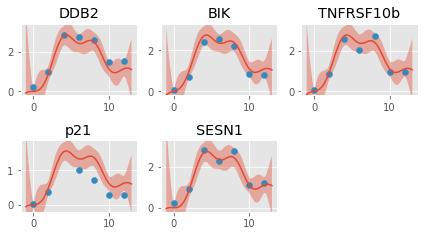

In [7]:
t_predict = torch.linspace(-1, 13, 80, dtype=torch.float64)

plotter.plot_outputs(t_predict, t_scatter=dataset.t_observed, y_scatter=dataset.m_observed)

plotter.plot_latents(t_predict, num_samples=0)

plotter.plot_kinetics()

In [5]:
Kxx = model.covar_module(model.train_t, model.train_t).evaluate()
plt.imshow(Kxx.detach())
plt.axis('off')


NameError: name 'plt' is not defined